# **2. 데이터 전처리**

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('titanic')

\- 상위 5개 데이터 확인

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Variable |	Definition	| Key
---------|-----------|-------------------------------
survival |	Survival |	0 = No, 1 = Yes
pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex	|
Age	| Age in years	|
sibsp |	# of siblings / spouses aboard the Titanic |
parch	| # of parents / children aboard the Titanic |
ticket	| Ticket number	 |
fare	| Passenger fare |
embarked	| Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton

\- 데이터 요약

In [7]:
df.describe()         # 데이터가 몇 개인지

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


\- 데이터 정보

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


\- 문제 : 처음부터 800번까지의 데이터를 학습 데이터로 이용하고, 나머지 데이터를 테스트 데이터로 이용하여 모델간의 결과를 비교하여라.

In [9]:
train_df = df[:800]
test_df = df[800:]

In [10]:
print(len(train_df))
print(len(test_df))

800
91


\- pclass 와 survived 의 관계(관계 있음)

In [11]:
train_df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)
# mean()은 평균

,pclass,survived
0,1,0.615385
1,2,0.481928
2,3,0.246014


\- sex 와 survived 의 관계(관계 있음)

In [12]:
train_df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.745583
1,male,0.187621


\- parch 와 survived 의 관계(관계가 적음)

In [13]:
# 참고. parch는 부모/자녀의 수
train_df[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
2,2,0.527778
1,1,0.514851
3,3,0.500000
0,0,0.350163
5,5,0.250000
4,4,0.000000
6,6,0.000000


\- sibsp 와 survived 의 관계(관계가 적음)

In [14]:
# 참고. sibsp는 자매/배우자 의 수
train_df[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.518325
2,2,0.481481
0,0,0.348708
3,3,0.266667
4,4,0.200000
5,5,0.000000
6,8,0.000000


\- age 와 survived 의 관계

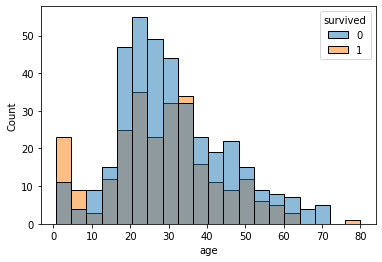

In [15]:
sns.histplot(data = train_df, x = 'age', bins = 20, hue = 'survived')

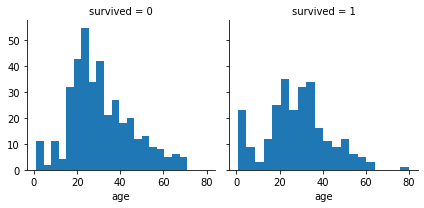

In [16]:
# FacetGrid : 그림 나누는 구간을 나눈다고 생각하면 될 듯
a = sns.FacetGrid(train_df, col='survived')
a.map(plt.hist, 'age', bins=20)

\- pclass 에 따른 age 별 survived 유무

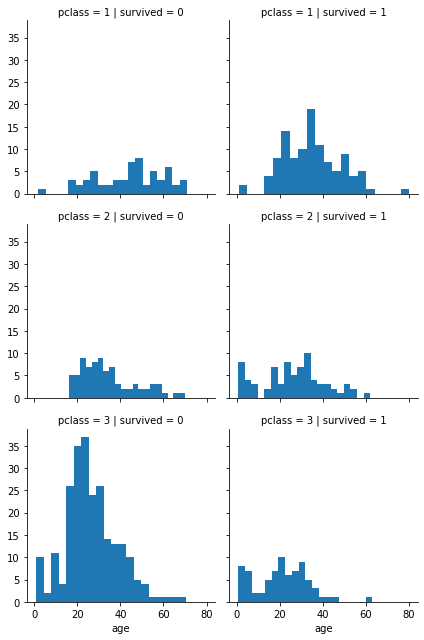

In [17]:
a = sns.FacetGrid(train_df, col='survived', row='pclass')
a.map(plt.hist, 'age', bins=20)

\- 필요없는 필드 삭제

In [18]:
names = train_df.columns
print(names)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [19]:
train_df = train_df.drop(names[4:], axis = 1)

In [20]:
train_df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [21]:
test_df = test_df.drop(names[4:], axis = 1)

In [22]:
test_df.head()

,survived,pclass,sex,age
800,0,2,male,34.00
801,1,2,female,31.00
802,1,1,male,11.00
803,1,3,male,0.42
804,1,3,male,27.00


\- 결측값 확인

In [23]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

survived      0
pclass        0
sex           0
age         163
dtype: int64
survived     0
pclass       0
sex          0
age         14
dtype: int64


\- age 평균으로 age 결측값 채우기

\* 만약 pclass 별 age 의 평균으로 채우고 싶다면 아래 주석 처리된 코드 사용

In [ ]:
# train_df["age"] = train_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))
# test_df["age"] = test_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))

In [24]:
train_df.fillna(train_df.mean()[['age']], inplace = True)
test_df.fillna(test_df.mean()[['age']], inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [25]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

survived    0
pclass      0
sex         0
age         0
dtype: int64
survived    0
pclass      0
sex         0
age         0
dtype: int64


\- 성별 인코딩

In [26]:
map_dict = {'female' : 0, 'male' : 1}

train_df['sex'] = train_df['sex'].map(map_dict).astype(int)
test_df['sex'] = test_df['sex'].map(map_dict).astype(int)

In [27]:
train_df.head()

,survived,pclass,sex,age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


\- 나이 분류

In [28]:
def function1(x):
    if x < 20:
        return 1
    elif x < 40:
        return 2
    elif x < 60:
        return 3
    else:
        return 4

In [29]:
train_df['age'] = train_df['age'].apply(function1)
test_df['age'] = test_df['age'].apply(function1)

In [30]:
train_df.head()

,survived,pclass,sex,age
0,0,3,1,2
1,1,1,0,2
2,1,3,0,2
3,1,1,0,2
4,0,3,1,2


# **3. 머신러닝 모델 구성 및 결과 검증**

In [31]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

\- 데이터 분류

In [32]:
X_train = train_df.drop(["survived"], axis=1)
Y_train = train_df["survived"]
X_test  = test_df.drop("survived", axis=1)
Y_test = test_df["survived"]

In [33]:
X_train.head()

,pclass,sex,age
0,3,1,2
1,1,0,2
2,3,0,2
3,1,0,2
4,3,1,2


In [34]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

\- 모델 생성 및 학습(decision tree 사용)

In [35]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

\- 모델 정확도 검증

In [36]:
print(decision_tree.score(X_train, Y_train))
print(decision_tree.score(X_test, Y_test))

0.8
0.7692307692307693


\- 실제값 예측값 비교 구현

In [37]:
Y_pred = decision_tree.predict(X_test)
print(Y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0]


In [38]:
Y_test

800    0
801    1
802    1
803    1
804    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 91, dtype: int64

In [39]:
len(Y_pred)

91

In [40]:
len(Y_test)

91

In [41]:
Y_test_list = list(Y_test)

In [42]:
Y_pred[0]

0

In [43]:
Y_test_list[0]

0

In [44]:
total = 0
for i in range(len(Y_pred)):
    if Y_pred[i] == Y_test_list[i]:
        total += 1
    else:
        pass
print(total)
print(total / len(Y_pred))

70
0.7692307692307693


\- graphviz 를 이용한 tree 구조 시각화

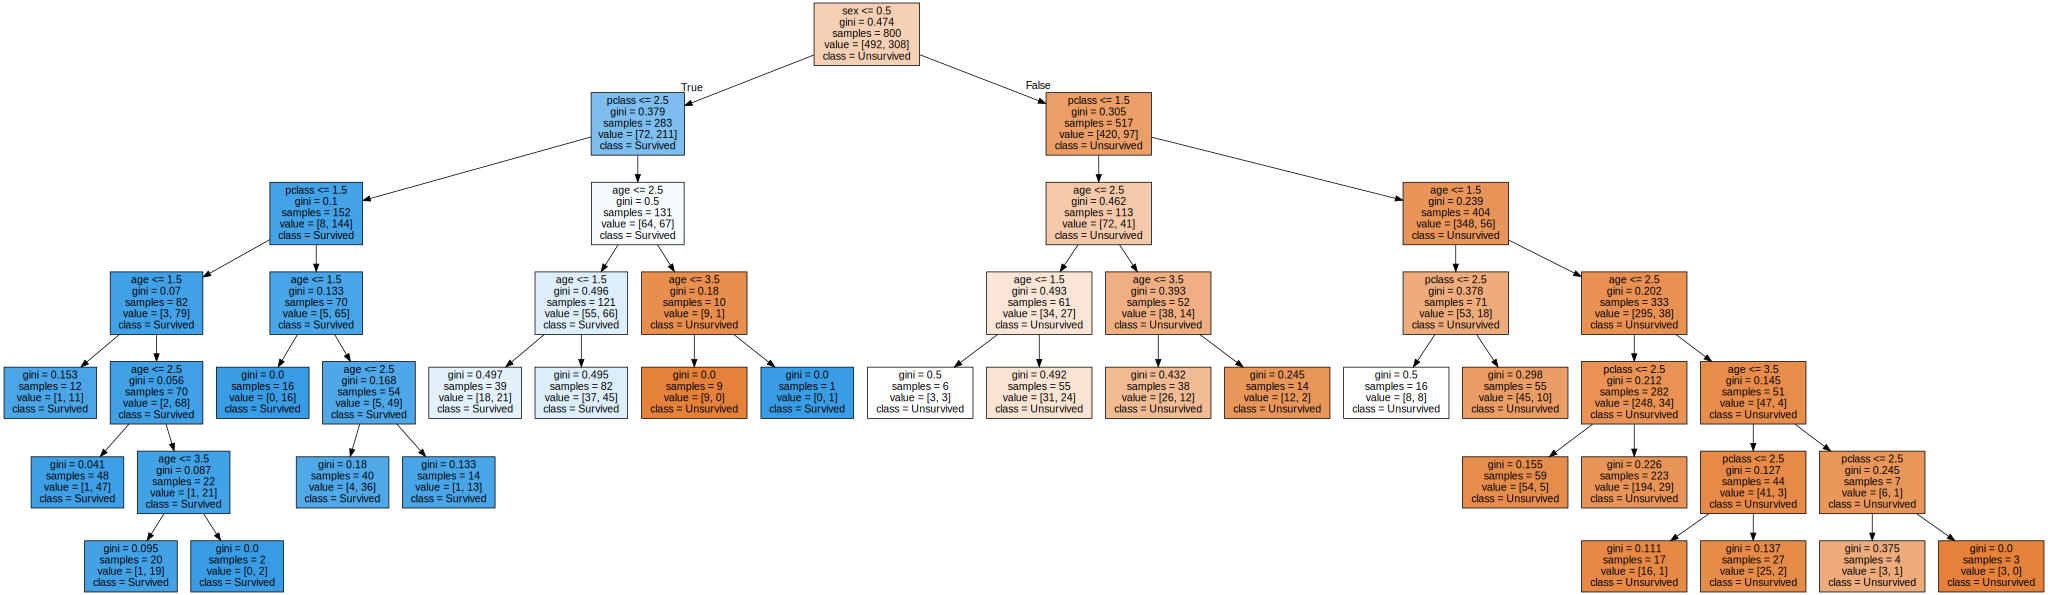

In [45]:
from sklearn.tree import export_graphviz

export_graphviz(
        decision_tree,
        out_file = "titanic.dot",                     # 원하는 파일.dot
        feature_names = ['pclass', 'sex', 'age'],
        class_names = ['Unsurvived','Survived'],
        filled=True
    )

# 위의 export_graphviz 함수를 통해 만든 titanic.dot을 렌더링해서 화면 상에 보여주는 과정
import graphviz
f = open('titanic.dot')
dot_graph = f.read()
# 자원을 효율적으로 쓰기 위해서는 아래 주석 처리 된 코드 사용
#with open("titanic.dot") as f:
#   dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename = 'titanic_tree')
dot

# **4. 다양한 머신러닝 기법**

\- 데이터 생성

In [46]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')

train_df = df[:800]
test_df = df[800:]

names = train_df.columns
train_df = train_df.drop(names[4:], axis = 1)
test_df = test_df.drop(names[4:], axis = 1)

train_df.fillna(train_df.mean()[['age']], inplace = True)
test_df.fillna(test_df.mean()[['age']], inplace = True)

map_dict = {'female' : 0, 'male' : 1}

train_df['sex'] = train_df['sex'].map(map_dict).astype(int)
test_df['sex'] = test_df['sex'].map(map_dict).astype(int)

def function1(x):
    if x < 20:
        return 1
    elif x < 40:
        return 2
    elif x < 60:
        return 3
    else:
        return 4

train_df['age'] = train_df['age'].apply(function1)
test_df['age'] = test_df['age'].apply(function1)

X_train = train_df.drop(["survived"], axis=1)
Y_train = train_df["survived"]
X_test  = test_df.drop("survived", axis=1)
Y_test = test_df["survived"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


\- 결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

print(decision_tree.score(X_train, Y_train))
print(decision_tree.score(X_test, Y_test))

0.8
0.7692307692307693


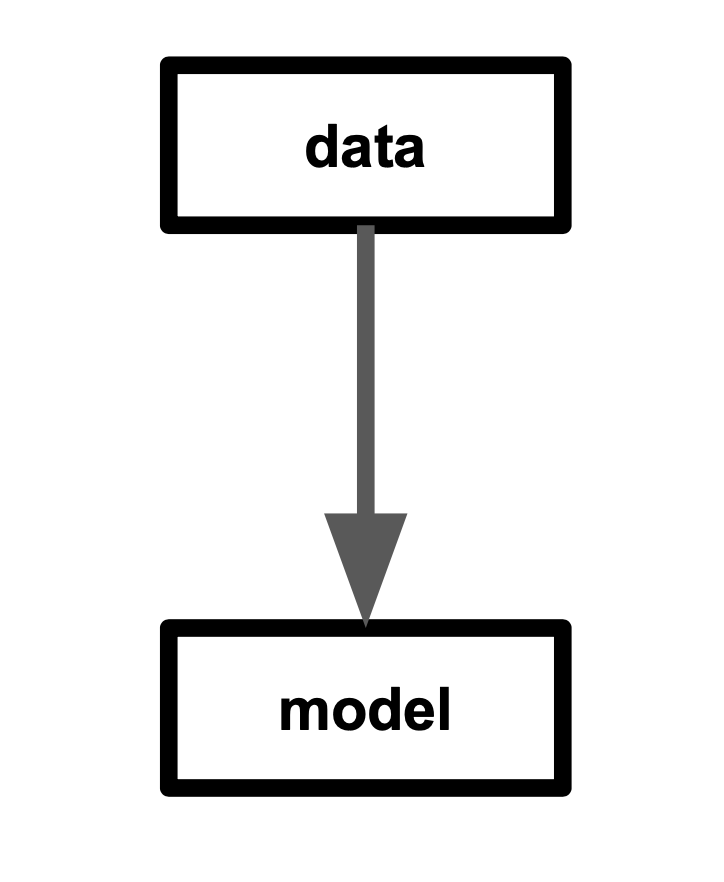

\- 배깅(랜덤 포레스트)

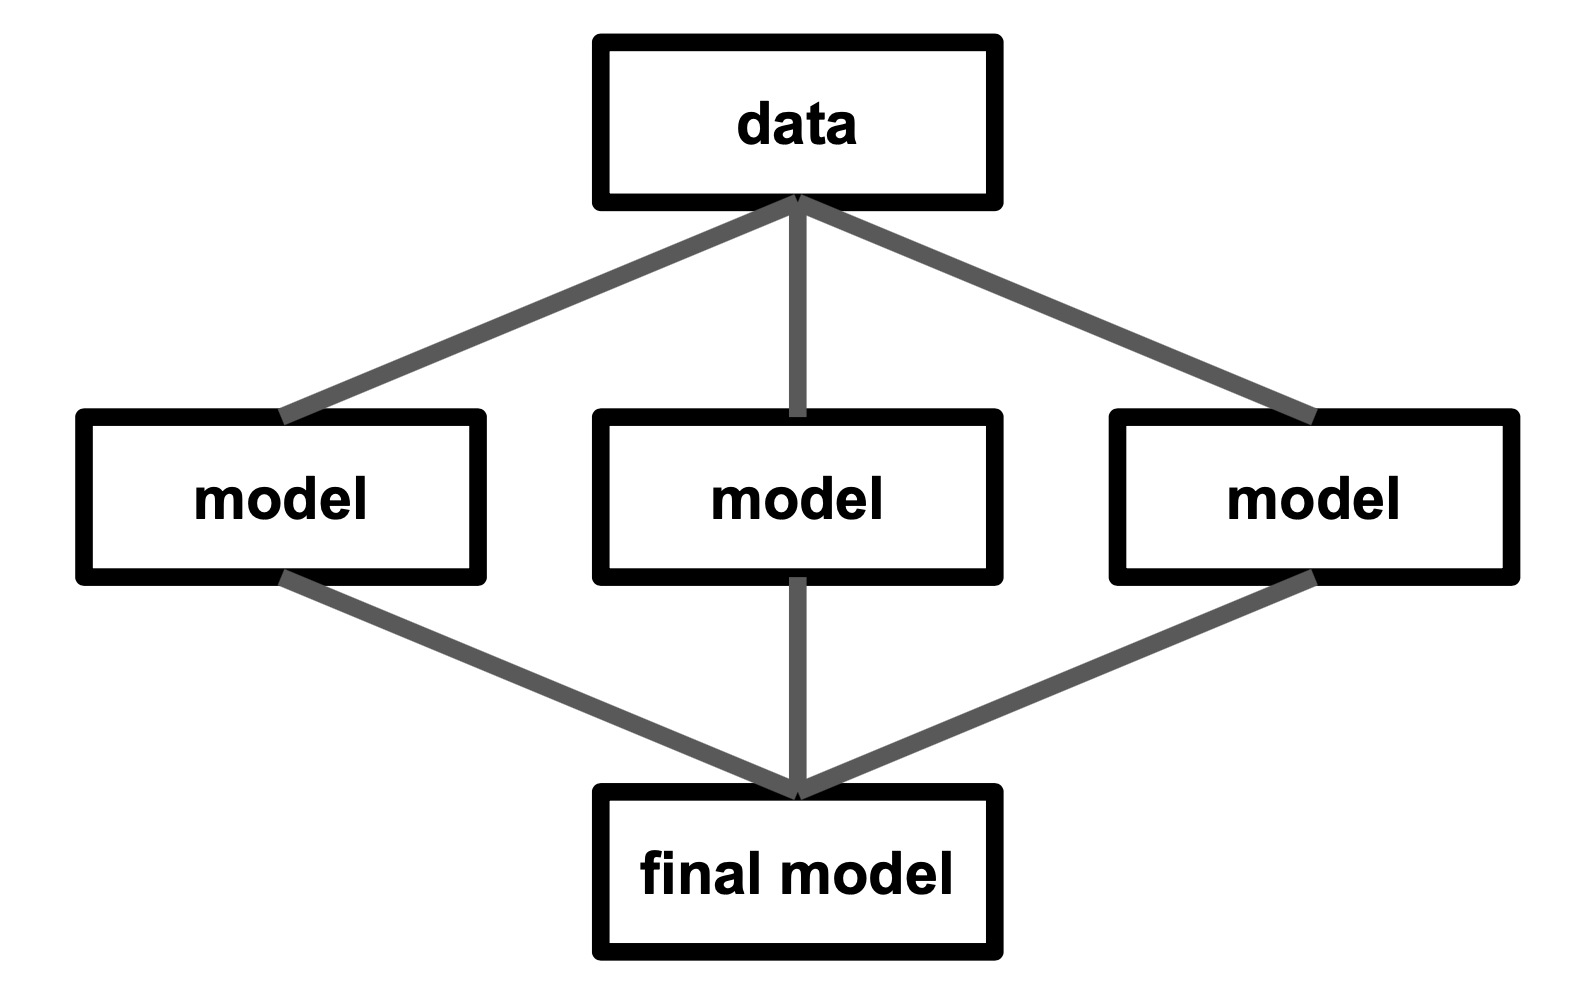

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
print(random_forest.score(X_train, Y_train))
print(random_forest.score(X_test, Y_test))

0.8
0.7912087912087912


\- 부스팅(xgboost)

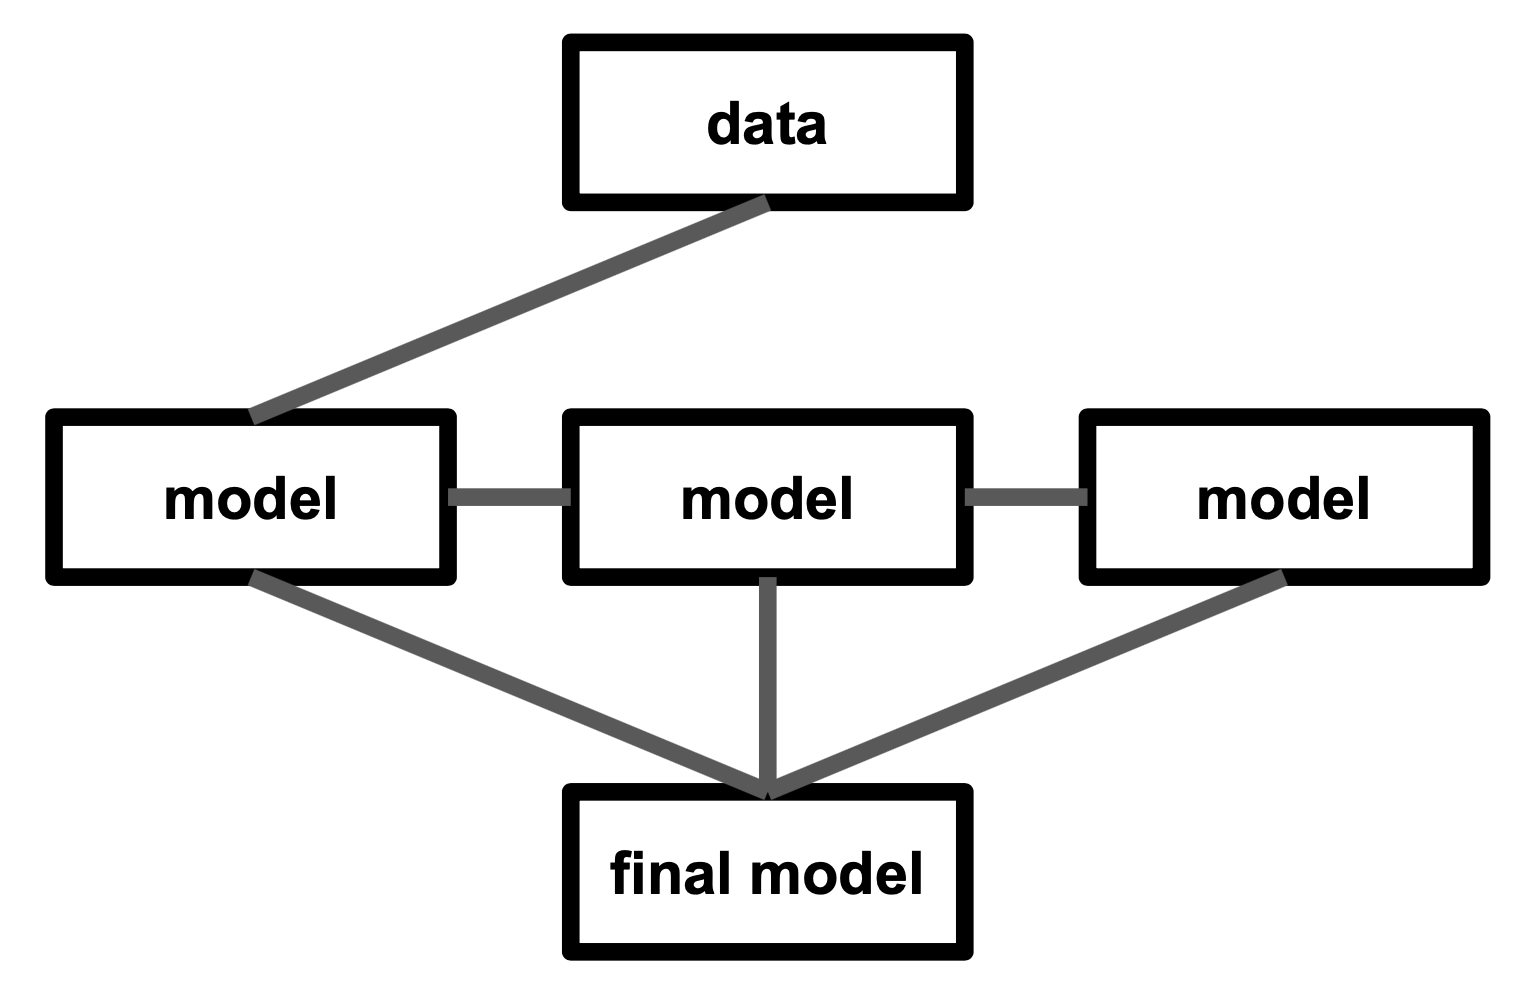

In [ ]:
import xgboost as xgb
boosting_model = xgb.XGBClassifier(n_estimators = 100)
boosting_model.fit(X_train, Y_train)
print(boosting_model.score(X_train, Y_train))
print(boosting_model.score(X_test, Y_test))

0.79875
0.7802197802197802
